In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import geopandas as gpd
import osmnx

In [5]:
path = "./data/Norwich/"
shape_f = path + "shapefiles/E07000148.shp"
norwich = gpd.read_file(shape_f)

In [7]:
norwich.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   lsoa11cd  83 non-null     object  
 1   geometry  83 non-null     geometry
dtypes: geometry(1), object(1)
memory usage: 1.4+ KB


In [9]:
#lsoa stands for lower layer super output area
norwich.head()

lsoa11cd                                           geometry
0  E01026791  POLYGON ((618360.527 309503.692, 618360.103 30...
1  E01026792  POLYGON ((617820.251 309252.089, 617820.121 30...
2  E01026793  POLYGON ((618822.898 309414.724, 618813.045 30...
3  E01026794  POLYGON ((616923.156 309617.352, 616918.668 30...
4  E01026796  POLYGON ((619264.507 309165.017, 619263.813 30...

<AxesSubplot:>

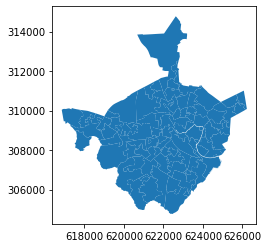

In [11]:
norwich.plot()

In [13]:
import pandas as pd

norwich_data = pd.read_csv(path + "tables/E07000148_QS102EW.csv") #population density
norwich_data.head()




lsoa11cd  date      lsoa11nm Rural Urban  \
0  E01026791  2011  Norwich 005A       Total   
1  E01026792  2011  Norwich 005B       Total   
2  E01026793  2011  Norwich 005C       Total   
3  E01026794  2011  Norwich 005D       Total   
4  E01026796  2011  Norwich 005F       Total   

   Area/Population Density: All usual residents; measures: Value  \
0                                               1475               
1                                               1445               
2                                               1817               
3                                               2065               
4                                               1643               

   Area/Population Density: Area Hectares; measures: Value  \
0                                              20.52         
1                                              35.61         
2                                              29.22         
3                                              75.62         
4                                              37.28         

   Area/Population Density: Density (number of persons per hectare); measures: Value  
0                                               71.9                                  
1                                               40.6                                  
2                                               62.2                                  
3                                               27.3                                  
4                                               44.1

In [15]:
norwich_merge = norwich.merge(norwich_data, on="lsoa11cd")
norwich_merge.head()

lsoa11cd                                           geometry  date  \
0  E01026791  POLYGON ((618360.527 309503.692, 618360.103 30...  2011   
1  E01026792  POLYGON ((617820.251 309252.089, 617820.121 30...  2011   
2  E01026793  POLYGON ((618822.898 309414.724, 618813.045 30...  2011   
3  E01026794  POLYGON ((616923.156 309617.352, 616918.668 30...  2011   
4  E01026796  POLYGON ((619264.507 309165.017, 619263.813 30...  2011   

       lsoa11nm Rural Urban  \
0  Norwich 005A       Total   
1  Norwich 005B       Total   
2  Norwich 005C       Total   
3  Norwich 005D       Total   
4  Norwich 005F       Total   

   Area/Population Density: All usual residents; measures: Value  \
0                                               1475               
1                                               1445               
2                                               1817               
3                                               2065               
4                                               1643               

   Area/Population Density: Area Hectares; measures: Value  \
0                                              20.52         
1                                              35.61         
2                                              29.22         
3                                              75.62         
4                                              37.28         

   Area/Population Density: Density (number of persons per hectare); measures: Value  
0                                               71.9                                  
1                                               40.6                                  
2                                               62.2                                  
3                                               27.3                                  
4                                               44.1

In [17]:
simple_norwich = norwich_merge.drop(["date", "lsoa11nm", "Rural Urban"], axis=1)
simple_norwich.columns = ["lsoa11cd", "geometry", "All usual residents", "Area Hectares", "Density"]
simple_norwich.head()

lsoa11cd                                           geometry  \
0  E01026791  POLYGON ((618360.527 309503.692, 618360.103 30...   
1  E01026792  POLYGON ((617820.251 309252.089, 617820.121 30...   
2  E01026793  POLYGON ((618822.898 309414.724, 618813.045 30...   
3  E01026794  POLYGON ((616923.156 309617.352, 616918.668 30...   
4  E01026796  POLYGON ((619264.507 309165.017, 619263.813 30...   

   All usual residents  Area Hectares  Density  
0                 1475          20.52     71.9  
1                 1445          35.61     40.6  
2                 1817          29.22     62.2  
3                 2065          75.62     27.3  
4                 1643          37.28     44.1

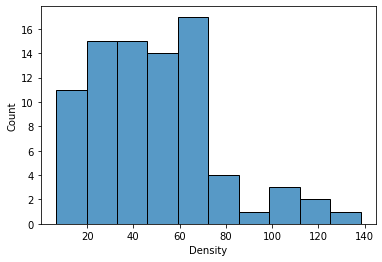

In [19]:
import seaborn

# we can look at the distribution of the Population Density across the zones in Norwich
norwich_histplot = seaborn.histplot(simple_norwich['Density'])

In [21]:
counts, bins, patches = norwich_histplot.hist(simple_norwich['Density'])

In [23]:
counts

array([11., 15., 15., 14., 17.,  4.,  1.,  3.,  2.,  1.])

In [25]:
bins

array([  6.6 ,  19.76,  32.92,  46.08,  59.24,  72.4 ,  85.56,  98.72,
       111.88, 125.04, 138.2 ])

In [27]:
simple_norwich['Density'].describe()

count     83.000000
mean      50.142169
std       26.641432
min        6.600000
25%       30.750000
50%       47.700000
75%       61.750000
max      138.200000
Name: Density, dtype: float64

<AxesSubplot:>

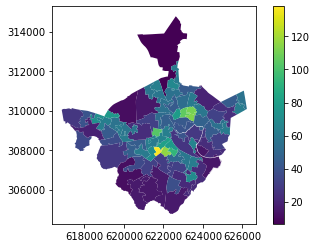

In [29]:
simple_norwich.plot(column='Density', legend=True)

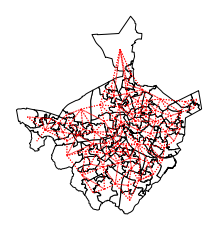

In [31]:
from pysal.lib import weights


wq = weights.contiguity.Queen.from_dataframe(simple_norwich)

ax = simple_norwich.plot(edgecolor='k', facecolor='w')
wq.plot(simple_norwich, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

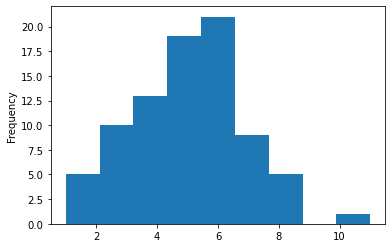

In [53]:
import pandas as pd
s = pd.Series(wq.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

In [33]:
from mapclassify import MaximumBreaks, Quantiles, JenksCaspall, FisherJenks, MaxP, BoxPlot, HeadTailBreaks, StdMean

# generate different splits for the measures.
measures = [MaximumBreaks, Quantiles, JenksCaspall, FisherJenks, MaxP,HeadTailBreaks, BoxPlot,StdMean]
paras = [{'k':10},{'k':10},{'k':10},{'k':10}, {'k':10},{}, {'hinge':1}, {}]
data = [m(simple_norwich['Density'], **p) for m, p in zip(measures, paras)]

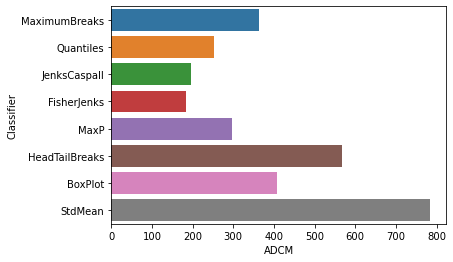

In [35]:
import pysal
import numpy as np
fits = np.array([ c.adcm for c in data])
concat_data = pd.DataFrame(fits)
concat_data['classifier'] = [c.name for c in data]
concat_data.columns = ['ADCM', 'Classifier']
ax = seaborn.barplot(y='Classifier', x='ADCM', data=concat_data)

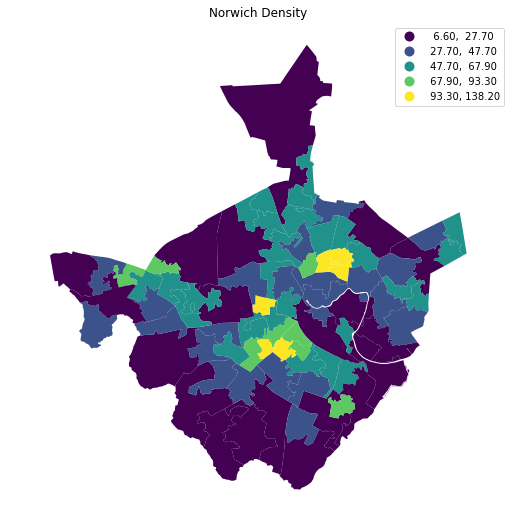

In [37]:
f, ax = plt.subplots(1, figsize=(9, 9))
simple_norwich.plot(ax=ax, column='Density', legend=True, scheme='FisherJenks')
ax.set_axis_off()
ax.set_title('Norwich Density')
plt.axis('equal')
plt.show()

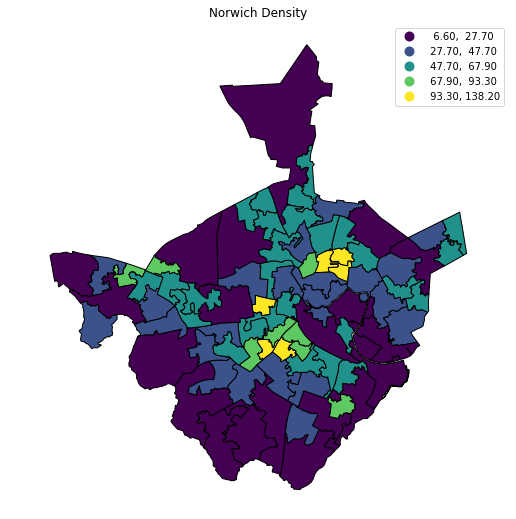

In [39]:
f, ax = plt.subplots(1, figsize=(9, 9))
simple_norwich.plot(ax=ax, column='Density', legend=True, scheme='FisherJenks', edgecolor='k')
ax.set_axis_off()
ax.set_title('Norwich Density')
plt.axis('equal')
plt.show()

In [41]:
bikepaths = osmnx.graph_from_place("Norwich, UK", network_type="bike")

In [43]:
len(bikepaths)

11572

In [45]:
import osmnx
pubs = osmnx.geometries_from_place("Norwich, UK",tags={"amenity": "pub"})

# drop the random streets
pubs = pubs.drop(index=[0,1])


D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [47]:
pubs.head()

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


unique_id      osmid element_type addr:city addr:country addr:postcode  \
2   way/71297069   71297069          way   Norwich           GB       NR4 7LD   
3   way/71297151   71297151          way   Norwich           GB       NR4 7AB   
4   way/93447444   93447444          way   Norwich           GB       NR3 4DY   
5  way/100168528  100168528          way   Norwich           GB       NR1 3QB   
6  way/103025547  103025547          way   Norwich           GB       NR5 8AZ   

      addr:street amenity            brand  fhrs:id  ... smoking  \
2    Eaton Street     pub              NaN    24888  ...     NaN   
3    Eaton Street     pub  Enterprise Inns   770694  ...     NaN   
4  Sprowston Road     pub              NaN    67958  ...     NaN   
5     Orford Hill     pub   JD Wetherspoon    54943  ...     NaN   
6      Gipsy Lane     pub    Sizzlers Inns  1287902  ...     NaN   

  payment:discover_card payment:mastercard payment:visa  \
2                   NaN                NaN          NaN   
3                   NaN                NaN          NaN   
4                   NaN                NaN          NaN   
5                   NaN                NaN          NaN   
6                   NaN                NaN          NaN   

  source:addr:housenumber addr:unit source:addr ways kitchen_hours type  
2                     NaN       NaN         NaN  NaN           NaN  NaN  
3                     NaN       NaN         NaN  NaN           NaN  NaN  
4                     NaN       NaN         NaN  NaN           NaN  NaN  
5                     NaN       NaN         NaN  NaN           NaN  NaN  
6                     NaN       NaN         NaN  NaN           NaN  NaN  

[5 rows x 91 columns]

In [49]:
pubs['centroid'] = pubs.geometry.centroid
pubs.head()

D:\Anaconda\envs\gis\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-104410a4e618>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  pubs['centroid'] = pubs.geometry.centroid


unique_id      osmid element_type addr:city addr:country addr:postcode  \
2   way/71297069   71297069          way   Norwich           GB       NR4 7LD   
3   way/71297151   71297151          way   Norwich           GB       NR4 7AB   
4   way/93447444   93447444          way   Norwich           GB       NR3 4DY   
5  way/100168528  100168528          way   Norwich           GB       NR1 3QB   
6  way/103025547  103025547          way   Norwich           GB       NR5 8AZ   

      addr:street amenity            brand  fhrs:id  ...  \
2    Eaton Street     pub              NaN    24888  ...   
3    Eaton Street     pub  Enterprise Inns   770694  ...   
4  Sprowston Road     pub              NaN    67958  ...   
5     Orford Hill     pub   JD Wetherspoon    54943  ...   
6      Gipsy Lane     pub    Sizzlers Inns  1287902  ...   

  payment:discover_card payment:mastercard payment:visa  \
2                   NaN                NaN          NaN   
3                   NaN                NaN          NaN   
4                   NaN                NaN          NaN   
5                   NaN                NaN          NaN   
6                   NaN                NaN          NaN   

  source:addr:housenumber addr:unit source:addr ways kitchen_hours type  \
2                     NaN       NaN         NaN  NaN           NaN  NaN   
3                     NaN       NaN         NaN  NaN           NaN  NaN   
4                     NaN       NaN         NaN  NaN           NaN  NaN   
5                     NaN       NaN         NaN  NaN           NaN  NaN   
6                     NaN       NaN         NaN  NaN           NaN  NaN   

                   centroid  
2  POINT (1.25057 52.60815)  
3  POINT (1.25278 52.60894)  
4  POINT (1.30983 52.65153)  
5  POINT (1.29519 52.62726)  
6  POINT (1.24856 52.62927)  

[5 rows x 92 columns]